## 1. Import Modules and Data

In [693]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import matplotlib as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
import scipy.stats as stats
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


## 2. Victims by Race

In [684]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())

# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]

# Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new column to display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race

,victim_race,crash_population
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [593]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
pct_race_df.style.format({"crash_population":"{:.2f%}"})
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


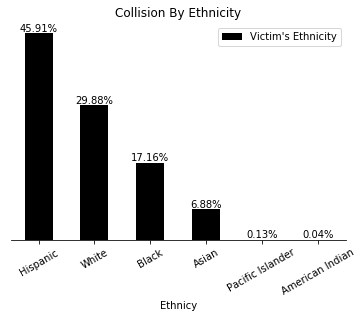

In [733]:
# Plot bar with DataFrame
fig1 = pct_race_df.plot(kind='bar', color='black')

# Format percentages on top of each bar
rects = fig1.patches
labels=pct_race_df.crash_population.tolist()
labels = ['{:.2f}%'.format(i) for i in labels]
for rect,label in zip(rects,labels):
      fig1.text(rect.get_x()+rect.get_width()/2,rect.get_height(),
                label,ha='center',va='bottom')

fig1.set_title('Collision By Ethnicity')  # Display graph title      
fig1.set_xlabel('Ethnicy')                # Display graph x axis label 
fig1.set_yticks([])                       # Remove graph y ticks labels
fig1.spines['right'].set_visible(False)   # Remove right edge line
fig1.spines['top'].set_visible(False)     # Remove top edge line
fig1.spines['left'].set_visible(False)    # Remove left edge line
fig1.legend(["Victim's Ethnicity"])       # Rename legend
fig1.tick_params(axis='x', rotation=30)   # Set parameres for x axis

# Export image
plta.savefig(os.path.join("figures","collision_by_ethnicity.png"))

LA Population Composition by race
>- Hispanic: 48.2%
- White (non-hispanic): 28.5%
- Black: 9.0%
- Asian: 11.6%
- Pacific Islander: 0.2%
- American Indian: 0.4%
- Other: 0.6%

src: https://statisticalatlas.com/place/California/Los-Angeles/Race-and-Ethnicity 

In [621]:
# Create dictionary of LA Ethnicity Population  
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

# Add a new column to display LA Ethnicity Populaton and formart crash population column
pct_race_df["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_df.style.format({"crash_population":"{:.2f}"})
multibar

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


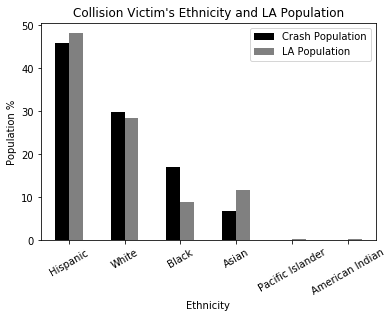

In [732]:
# Set required data parameres 
xaxis = ["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"] 
crash = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

# Create DataFrame and add la_pop list to it
crash_df = pd.DataFrame(crash,xaxis)
crash_df[1] = la_pop

# Rename colums to display Crash Population and LA Population 
crash_df = crash_df.rename(columns = 
                           {0:'Crash Population',1:'LA Population'})

# Generate the Plot 
fig2 = crash_df.plot(kind='bar', color=["black", "gray"], use_index=True)


# Display graph title
fig2.set_title("Collision Victim's Ethnicity and LA Population")
fig2.set_xlabel("Ethnicity")            # Give graph x axis label
fig2.set_ylabel ("Population %")        # Give graph y axis label
fig2.legend(loc="best")                 # Display legend in best location
fig2.tick_params(axis='x', rotation=30) # Set parameres for x axis


# Export image
plta.savefig(os.path.join("figures", "collision_ethnicity_LApopulation.png"))

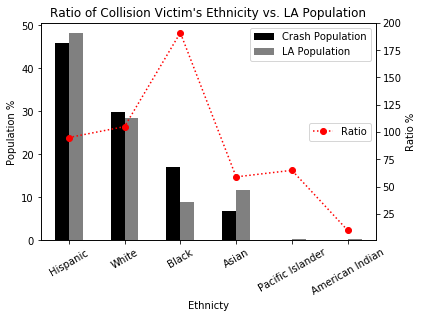

In [731]:
# Set parameres for the ratio of crash victims vs LA population 
ratio = [95, 105, 191, 59, 65, 10]

# Generate the Plot with ratio line
fig3 = crash_df.plot(kind='bar', color=["black", "gray"], use_index=True)
line_data = fig3.twinx()
line_fig = line_data.plot(ratio, linestyle=':',marker='o',color='red', label='Ratio')

# Display graph title
plta.title("Ratio of Collision Victim's Ethnicity vs. LA Population")
plta.ylabel("Ratio %")                   # Give graph right y axis label
plta.legend(loc="right")                 # Display "Ratio" legend to the right
fig3.set_xlabel("Ethnicty")              # Give graph x axis label
fig3.set_ylabel ("Population %")         # Give graph left y axis label
fig3.legend(loc="best")                  # Display legend in best location
fig3.tick_params(axis='x', rotation=30)  # Set parameres for x axis

# Export image
plta.savefig(os.path.join("figures","collision_ethnicity_ratio.png"))

## 3. Victims Collision by Gender

src: https://www.states101.com/gender-ratios/california/los-angeles-county

In [650]:
# Create DataFrame with the total counts of each gender
sex_race_counts = pd.DataFrame(df['victim_sex'].value_counts())

# Only display Male and Female, omit unknown
sex_race_counts = sex_race_counts.loc[["Male", "Female"]] 
sex_race_counts

,victim_sex
Male,234600
Female,165158


In [685]:
# Calculate the percentage of victim's gender
sex_pct = sex_race_counts/sex_race_counts.sum()*100

# Create dictionary of LA Gender Population
gender_pop = {"Male": "49.2531",
              "Female": "50.7468"}

# Add a new column to display LA Gender Populaton 
sex_pct["pop_pct"] = pd.Series(gender_pop)
sex_pct

,victim_sex,pop_pct
Male,58.685505,49.2531
Female,41.314495,50.7468


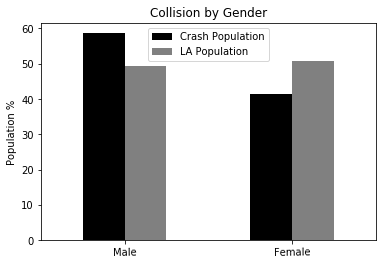

In [687]:
# Set the parameters 
ratio = [118.86, 81.22]
xaxis = ['Male', 'Female'] 
crash = (58.69, 41.31)
la_pop = (49.25, 50.75)

# Create DataFrame and add la_pop list to it
gender_df = pd.DataFrame(crash,xaxis)
gender_df[1] = la_pop 

# Rename colums to display Crash Population and LA Population 
gender_df = gender_df.rename(columns = {0:'Crash Population',1:'LA Population'})

# Generate the Plot 
fig4 = gender_df.plot(kind='bar', color=["black", "gray"], use_index=True)
        
fig4.set_title("Collision by Gender")  # Display graph title
fig4.set_ylabel("Population %")        # Give graph y axis label
fig4.legend(loc="upper center")        # Display legend in upper center
fig4.tick_params(axis='x', rotation=1) # Set parameres for x axis

# Export image
plta.savefig(os.path.join("figures", "collision_by_gender.png"))

## 4. Age Mean per Ethnicity

LA Age Categories

>- Children: less than 18 years old
- College: from 18 to 21 years old
- Younger Adult: from 22 to 39 years old
- Older Adult: from 40 to 64 years old
- Senior: more than 64 years old

src: https://statisticalatlas.com/place/California/Los-Angeles/Age-and-Sex

In [730]:
# Average Victim Race per Ethnicity
df1 = df.copy()                                   # Copy original DataFrame
df1 = df1[['victim_race','victim_age']]           # Display only Victim Race and Victim Age
df1=df1.groupby(['victim_race'])                  # Group by Victim Race
meandata = pd.DataFrame(df1['victim_age'].mean()) # Create DataFrame with average Victim Age per Ethnicity
meandata = meandata[meandata.index!='Unknown']    # Omit Unknown from DataFrame
meandata                                         # Display DataFrame

,victim_age
victim_race,
American Indian,39.251852
Asian,43.144806
Black,42.442624
Hispanic,38.550448
Pacific Islander,43.513575
White,43.526373


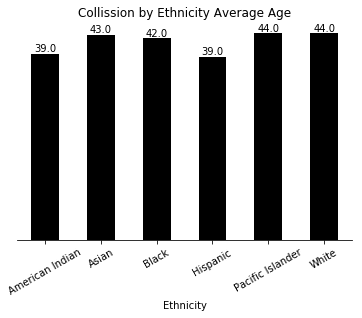

In [728]:
# Plot Average Victim Age per Ethnicity
fig5 = meandata.plot(kind='bar', color="black")

# Format percentages on top of each bar
rects = fig5.patches
labels=meandata.victim_age.tolist()
labels=[round(i,0) for i in labels]
sum_labels = sum(labels)
for rect,label in zip(rects,labels):
      fig5.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va='bottom')

fig5.set_title("Collission by Ethnicity Average Age") # Display graph title  
fig5.set_xlabel("Ethnicity")                          # Display graph x axis label 
fig5.set_yticks([])                                   # Remove graph y ticks labels
fig5.legend().remove()                                # Remove legend
fig5.spines['right'].set_visible(False)               # Remove right edge line
fig5.spines['top'].set_visible(False)                 # Remove top edge line
fig5.spines['left'].set_visible(False)                # Remove left edge line
fig5.tick_params(axis='x', rotation=30)               # Set parameres for x axis

# Export image
plta.savefig(os.path.join("figures", "collision_ethnicity_mean.png"))

In [706]:
# Remove Unknown from Victim Race
race_data = race_data[race_data.index!='Unknown']
race_data

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


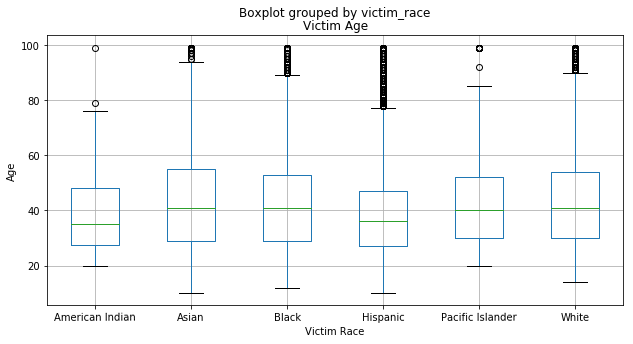

In [734]:
# Boxplot by Victim Age and Race
df1 = df.copy()                          # Copy original DataFrame
df1 = df1[['victim_race','victim_age']]  # Display only Victim Race and Victim Age
df1 = df1[df1['victim_race']!='Unknown'] # Omit Unknown from DataFrame

# Plot BoxPlot with Victim Age and Race
fig6 = df1.boxplot('victim_age',by='victim_race', figsize=(10, 5))

fig6.set_title("Victim Age")              # Display graph title 
fig6.set_xlabel("Victim Race")            # Display graph x axis label
fig6.set_ylabel("Age")                    # Display graph y axis label
fig6.tick_params(axis='x', rotation=.25)   # Set parameres for x axis

# Export image
plta.savefig(os.path.join("figures", "boxplot_mean_age.png"))

In [413]:
# Extract individual groups
Hispanic = df1[df1["victim_race"] == "Hispanic"]["victim_age"]
White =  df1[df1["victim_race"] == "White"]["victim_age"]
Black = df1[df1["victim_race"] == "Black"]["victim_age"]
Asian = df1[df1["victim_race"] == "Asian"]["victim_age"]
PacificIsl = df1[df1["victim_race"] == "Pacific Islander"]["victim_age"]
AmericanInd = df1[df1["victim_race"] == "American Indian"]["victim_age"]

In [416]:
# Perform the ANOVA
stats.f_oneway(Hispanic, White, Black, Asian, PacificIsl, AmericanInd)

F_onewayResult(statistic=1566.0672656810764, pvalue=0.0)

In [384]:
#create bins to extract age range
bins = [0,19,22,40,65, float("inf")]
age = ["Children ( < 18 years old )",
       "College ( 18 to 21 years old )",
       "Younger Adult ( 22 to 39 years old )",
       "Older Adult ( 40 to 64 years old )",
       "Senior ( > 64 years old )"]

df['Age Category'] = pd.cut(df['victim_age'],bins, right=False, labels=age)

age_group = df.groupby("Age Category")
print(age_group["victim_race", "victim_age"].mean())

age_count["age_count"] = age_group[["victim_age"]].count()
age_count["age_mean"] = age_group["victim_age"].mean()
age_df = age_count[["age_count","age_mean"]]
age_df

                                      victim_age
Age Category                                    
Children ( < 18 years old )            17.578563
College ( 18 to 21 years old )         20.504053
Younger Adult ( 22 to 39 years old )   29.902646
Older Adult ( 40 to 64 years old )     50.168594
Senior ( > 64 years old )              76.831921


,age_count,age_mean
Age Category,,
Children ( < 18 years old ),821,17.578563
College ( 18 to 21 years old ),18256,20.504053
Younger Adult ( 22 to 39 years old ),186505,29.902646
Older Adult ( 40 to 64 years old ),161744,50.168594
Senior ( > 64 years old ),33395,76.831921
